In [1]:
library(tidyverse)
library(limma)
library(QFeatures)
library(msqrob2)
library(plotly)
library(gridExtra)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: MultiAssayExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:mat

In [2]:
peptidesFile <- msdata::quant(pattern = "cptac_a_b_peptides", full.names = TRUE)

ecols <- grep("Intensity\\.", names(read.delim(peptidesFile)))

pe <- readQFeatures(
    table = peptidesFile, fnames = 1, ecol = ecols,
    name = "peptideRaw", sep = "\t"
)

In [15]:
help(readQFeatures)

In [14]:
ecols

[1] 56 57 58 59 60 61

In [3]:
peptidesFile

[1] "/home/ptruong/anaconda3/envs/r_env/lib/R/library/msdata/quant/cptac_a_b_peptides.txt"

In [4]:
cond <- which(strsplit(colnames(pe)[[1]][1], split = "")[[1]] == "A") # find where condition is stored
colData(pe)$condition <- substr(colnames(pe), cond, cond) %>%
    unlist() %>%
    as.factor()

In [26]:
substr(colnames(pe), cond, cond) %>%
    unlist() %>%
    as.factor()

peptideRaw peptideRaw peptideRaw peptideRaw peptideRaw peptideRaw peptideLog 
         A          A          A          B          B          B          A 
peptideLog peptideLog peptideLog peptideLog peptideLog 
         A          A          B          B          B 
Levels: A B

In [24]:
help(substr)

In [17]:
cond

[1] 12

In [6]:
rowData(pe[["peptideRaw"]])$nNonZero <- rowSums(assay(pe[["peptideRaw"]]) > 0)

In [7]:
pe <- zeroIsNA(pe, "peptideRaw") # convert 0 to NA

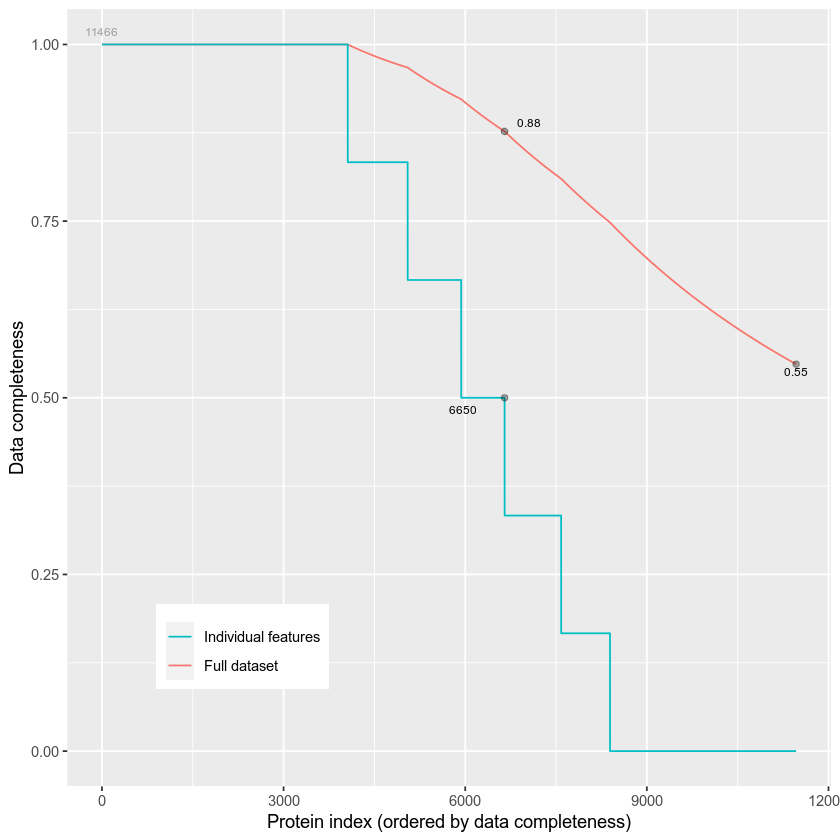

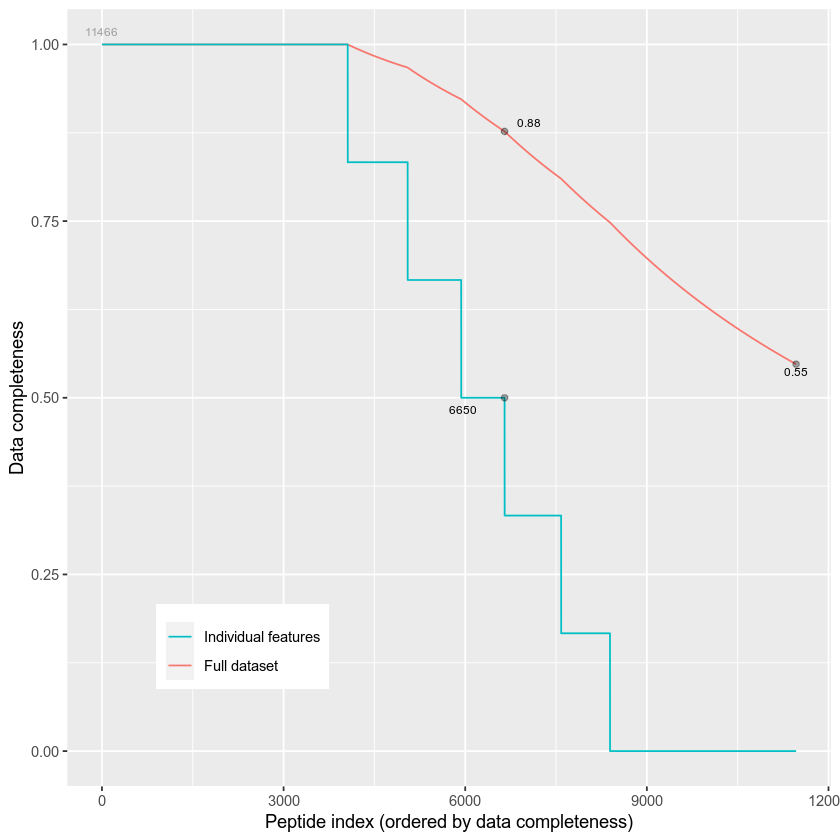

In [8]:
MSnbase::plotNA(assay(pe[["peptideRaw"]])) +
    xlab("Peptide index (ordered by data completeness)")

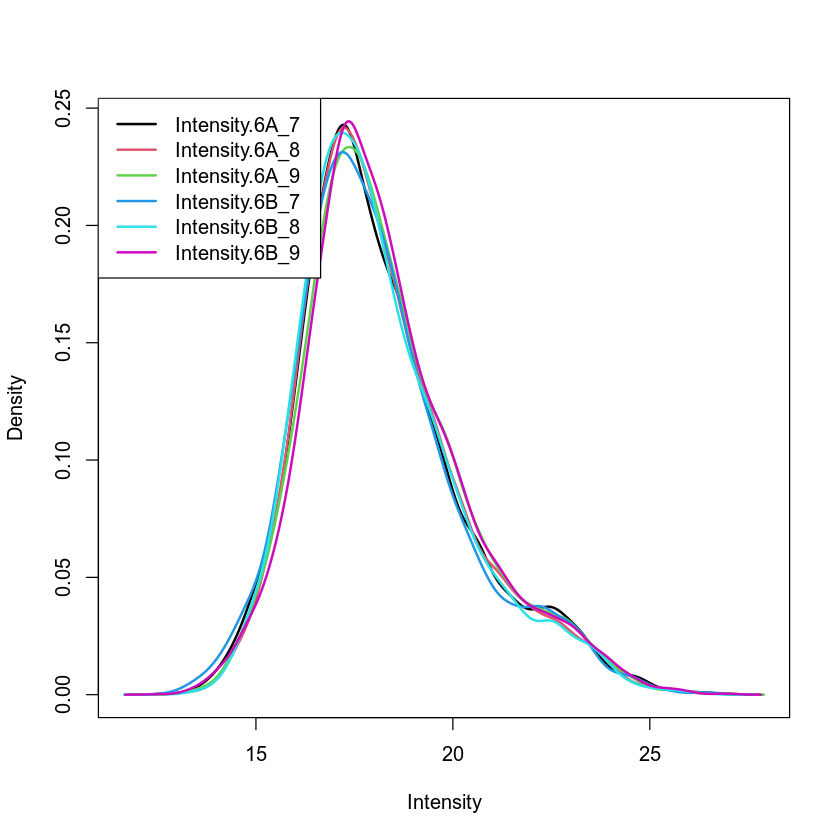

In [9]:
pe <- logTransform(pe, base = 2, i = "peptideRaw", name = "peptideLog")
limma::plotDensities(assay(pe[["peptideLog"]]))

In [10]:
pe <- filterFeatures(pe, ~ Proteins %in% smallestUniqueGroups(rowData(pe[["peptideLog"]])$Proteins))

In [11]:
pe <- filterFeatures(pe, ~ Reverse != "+")
pe <- filterFeatures(pe, ~ Potential.contaminant != "+")

In [12]:
pe <- filterFeatures(pe, ~ nNonZero >= 2)
nrow(pe[["peptideLog"]])

[1] 7011

In [13]:
pe[["peptideLog"]]

class: SummarizedExperiment 
dim: 7011 6 
metadata(0):
assays(1): ''
rownames(7011): AAAAGAGGAGDSGDAVTK AAAALAGGK ... YYTFNGPNYNENETIR
  YYTITEVATR
rowData names(66): Sequence N.term.cleavage.window ... MS.MS.Count
  nNonZero
colnames(6): Intensity.6A_7 Intensity.6A_8 ... Intensity.6B_8
  Intensity.6B_9
colData names(0):